# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


# Implementation



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [135]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, shuffle=True, random_state=3)

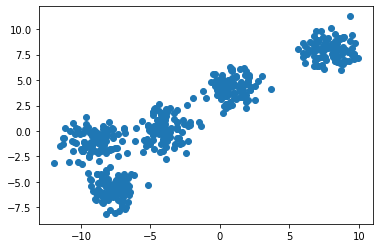

In [136]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [137]:
k = 5
color = ["green", "red", "orange", "blue", "yellow"]

clusters = {}

for i in range(k):
    x = np.random.randint(-10, 10)
    y = np.random.randint(-7.5, 10)
    center = np.array([x,y])

    points = []
    
    cluster = {
        'color' : color[i],
        'center' : center,
        'points' : points
    }

    clusters[i] = cluster

In [140]:
clusters

{0: {'color': 'green', 'center': array([-6,  1]), 'points': []},
 1: {'color': 'red', 'center': array([-7, -7]), 'points': []},
 2: {'color': 'orange', 'center': array([-1,  1]), 'points': []},
 3: {'color': 'blue', 'center': array([-7,  0]), 'points': []},
 4: {'color': 'yellow', 'center': array([-10,  -5]), 'points': []}}

In [141]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

## Step2 - Assign Points to nearst cluster

In [142]:
def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):
        dist = [] 
        
        curr_x = X[ix]
        
        for k in range(len(clusters)):
            d  = distance(curr_x, clusters[k]['center'])
            dist.append(d)
        
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [143]:
assignPointsToCluster(clusters, X)

In [144]:
for i in range(5):
    print(len(clusters[i]['points']))

61
73
226
99
41


# Step 3 - Update Cluster Centeroids

In [145]:
def updateClusters(clusters):
    for kx in range(len(clusters)):
        all_points = clusters[kx]['points']
        all_points = np.array(all_points)
        
        if all_points.shape[0] >0:
            mean = np.mean(all_points, axis = 0)
            clusters[kx]['center'] = mean

            clusters[kx]['points'] = []

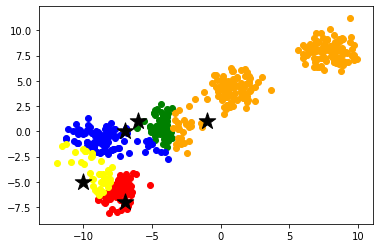

In [146]:
def plotClusters(clusters):
  

    
    for kx in range(len(clusters)):
        
        all_points = clusters[kx]['points']
        all_points = np.array(all_points)
        
        try:
            plt.scatter(all_points[:, 0], all_points[:, 1], c = clusters[kx]['color'])
        except:
            pass
        c = clusters[kx]['center']
        plt.scatter(c[0], c[1], s=300, marker="*", color="black")
        
    plt.show()       
    
plotClusters(clusters)

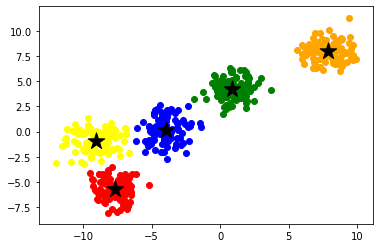

In [180]:
updateClusters(clusters)
assignPointsToCluster(clusters, X)
plotClusters(clusters)